In [1]:
from benchmark_demo.Benchmark import Benchmark
from benchmark_demo.SignalBank import SignalBank
from benchmark_demo.ResultsInterpreter import ResultsInterpreter
import pickle
import pandas as pd
import seaborn as sns


# import seaborn as sns
from benchmark_demo.utilstf import *
import matplotlib.pyplot as plt
from matplotlib import style	
# plt.style.use('seaborn-colorblind')
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid
import string


In [2]:
filename = None
if filename is None:
    filename = '../results/last_benchmark_denoising'

with open(filename + '.pkl', 'rb') as f:
    benchmark = pickle.load(f)  
print(isinstance(benchmark,Benchmark))
# print(benchmark.methods_ids)

True


In [3]:
# This figure generates a rectangle around the signal component
def component_box(signal, S, ax=None):
    instf = signal.instf
    comps = signal.comps
    for comp in comps:
        y_max = int(np.max(comp)*2*S.shape[0])
        y_min = int(np.min(comp[comp>0])*2*S.shape[0])
        x_min = np.where(np.abs(comp)>0)[0][0]
        x_max = np.where(np.abs(comp)>0.0)[0][-1]
        color = 'r'
        w = 50
        ax.plot([x_min, x_min],[y_min, y_max], color=color)
        ax.plot([x_max, x_max],[y_min, y_max], color=color)
        ax.plot([x_min, x_max],[y_min, y_min], color=color)
        ax.plot([x_min, x_max],[y_max, y_max], color=color)

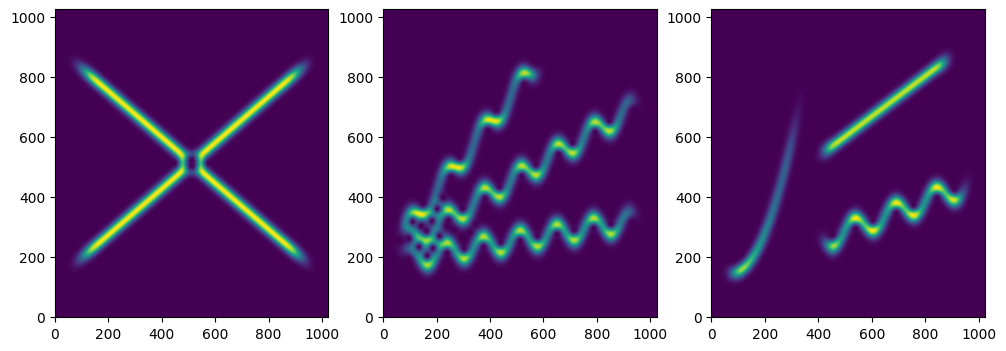

In [4]:
signal_id = benchmark.signal_ids
N = benchmark.N
sb = SignalBank(N, return_signal=True)
signal_dict = sb.generate_signal_dict()
Nsignals = len(signal_id)

Nfft = 2*N
g,_ = get_round_window(Nfft)

fig, axs = plt.subplots(1,Nsignals,figsize=(4*Nsignals,4))
S = []
for i in range(Nsignals):
    signal = signal_dict[signal_id[i]]()
    Saux, _ = get_spectrogram(signal, window = g)
    S.append(Saux)
    axs[i].imshow(Saux, origin='lower', aspect='auto')
    # component_box(signal, S, ax=axs[i])

In [5]:
from benchmark_demo.ResultsInterpreter import ResultsInterpreter

filename = None
if filename is None:
    filename = '../results/last_benchmark_denoising'

with open(filename + '.pkl', 'rb') as f:
    benchmark = pickle.load(f)  
print(isinstance(benchmark,Benchmark))
# print(benchmark.methods_ids)
# results = benchmark.results
ri = ResultsInterpreter(benchmark)
df = ri.get_benchmark_as_data_frame()
df = ri.rearrange_data_frame(df)

df = df.reset_index()
# df = df.drop(labels='level_3', axis=1)
col_names = list(df.columns)
# col_names[0:5] = ['Signal Id.', 'SNR', 'Method', 'Parameters', 'Iteration']
# df.columns = col_names
df['Method'] = df['Method']+ '-' + df['Parameter']
df

True


,index,SNRin,Method,Parameter,Signal_id,Repetition,QRF
0,0,-20,"brevdo_method-((), {})","((), {})",McCrossingChirps,0,-14.477848
1,1,-20,"brevdo_method-((), {})","((), {})",McCrossingChirps,1,-14.771467
2,2,-20,"brevdo_method-((), {})","((), {})",McCrossingChirps,2,-14.765640
3,3,-20,"brevdo_method-((), {})","((), {})",McCrossingChirps,3,-14.722328
4,4,-20,"brevdo_method-((), {})","((), {})",McCrossingChirps,4,-14.753668
...,...,...,...,...,...,...,...
1615,1615,20,"pseudo_bayesian_method-([], True, [], [], [], ...","([], True, [], [], [], [], [], [], [], [])",McSyntheticMixture5,5,-4.298461
1616,1616,20,"pseudo_bayesian_method-([], True, [], [], [], ...","([], True, [], [], [], [], [], [], [], [])",McSyntheticMixture5,6,-4.349579
1617,1617,20,"pseudo_bayesian_method-([], True, [], [], [], ...","([], True, [], [], [], [], [], [], [], [])",McSyntheticMixture5,7,-4.377350
1618,1618,20,"pseudo_bayesian_method-([], True, [], [], [], ...","([], True, [], [], [], [], [], [], [], [])",McSyntheticMixture5,8,-4.248517


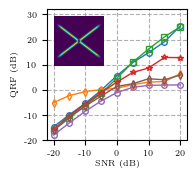

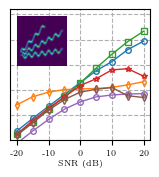

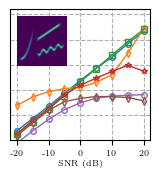

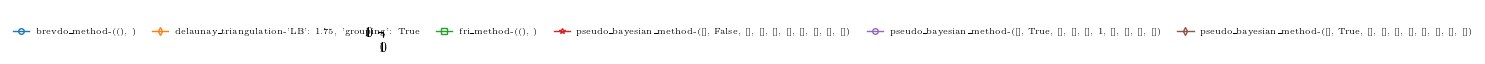

In [6]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

signal_ids = np.unique(df['Signal_id'])
Nsignals = len(signal_ids)
# fig, axs = plt.subplots(1,signal.total_comps,figsize=(1.5*Nsignals,1.5),sharey=True)

fig_w = 1.8
fig_h = 1.7
spsize = 0.5

for i,sid in enumerate(signal_ids):
    fig, axs = plt.subplots(1,1, figsize=(fig_w,fig_h),)
    df_aux = df[df['Signal_id']==sid]
    signal = signal_dict[sid]()

    axins = inset_axes(axs, width=spsize, height=spsize, loc=2) #loc=spectrogram_loc[i])
    # axins.imshow(np.log(S), origin='lower')
    axins.imshow(S[i], origin='lower')
    axins.axis('off')
    fig.canvas.draw()
    axins.tick_params(axis='both', which='both', bottom=False, top=False, 
                    labelbottom=False, right=False, left=False, labelleft=False)
                    
    ri.get_snr_plot(df_aux, 
                    x='SNRin', 
                    y='QRF', 
                    hue='Method', 
                    axis = axs,
                    ms = 4,
                    linewidth=1.0,
                    markerfacecolor = 'none')

    # axs.get_legend().remove()
    axs.set_aspect('auto')
    # print(axs.get_xticks()[2])
    axs.set_xticks([axs.get_xticks()[i] for i in [0,2,4,6,8]])
    axs.set_xticklabels([-20,-10,0,10,20],fontsize=6.0)
    axs.set_yticks([-20,-10,0,10,20,30])
    axs.set_yticklabels([-20,-10,0,10,20,30],fontsize=6.0)
    # axs.set_xticklabels(, fontsize=6.0)
    if i==0:
        axs.set_ylabel(r'QRF (dB)', fontsize=6.0)
    else:
        axs.set_ylabel(r'')
        axs.set_yticklabels([])
        axs.tick_params(axis=u'y', which=u'both',length=0)
        # axs.yaxis.set_major_locator(plt.NullLocator())

    axs.set_xlabel(r'SNR (dB)', fontsize=6.0, labelpad=1)

    axs.set_ylim([-20,32])
    # axs[j].set_title('Comp.{}'.format(j+1), fontsize=6.0)
    axs.grid(True, linestyle='--', zorder=0)
    fig.savefig('qrf_signal_{}.pdf'.format(i), dpi=900, transparent=False, bbox_inches='tight', pad_inches=0)


# new_legends = (r'SST+RD',r'Contours',r'DT',r'ES',r'PB',r'T-Garrote',r'T-Hard')
new_legends = (r'SST+RD',r'DT',r'FRI',r'PB',r'PB+SST')
legendFig = plt.figure(figsize=(4*fig_w,0.3))
# legendFig.set_size_inches((fig_size_w,fig_size_h))
h,l = axs.get_legend_handles_labels()
legendFig.legend(h,l,#new_legends, 
            fontsize='xx-small', 
            frameon=False, 
            loc='center', 
            ncol=6
            )
legendFig.canvas.draw()
legendFig.savefig('legend_qrf_signal.pdf', dpi=900, transparent=False, bbox_inches='tight', pad_inches=0)
legendFig.add_axes([0,0,0,0])

plt.show()


In [7]:
filename = None
if filename is None:
    filename = '../results/last_benchmark_component_denoising'

with open(filename + '.pkl', 'rb') as f:
    benchmark = pickle.load(f)  
print(isinstance(benchmark,Benchmark))
# print(benchmark.methods_ids)
results = benchmark.results
df = benchmark.dic2df(results)
# df = pd.DataFrame(results)
df = df.reset_index()
# df = df.drop(labels='level_3', axis=1)
col_names = list(df.columns)
col_names[0:5] = ['Signal Id.', 'SNR', 'Method','Parameters', 'Iteration']
df.columns = col_names
df['Method'] = df['Method']+ '-' + df['Parameters'] 
df

True


,Signal Id.,SNR,Method,Parameters,Iteration,Comp.0,Comp.1,Comp.2
0,McCrossingChirps,-20,"fri_method-([], [], [], [], [], [], True)","([], [], [], [], [], [], True)",0,-15.981424,-16.07152,NaN
1,McCrossingChirps,-20,"fri_method-([], [], [], [], [], [], True)","([], [], [], [], [], [], True)",1,-15.803497,-15.946401,NaN
2,McCrossingChirps,-20,"fri_method-([], [], [], [], [], [], True)","([], [], [], [], [], [], True)",2,-16.065761,-15.686947,NaN
3,McCrossingChirps,-20,"fri_method-([], [], [], [], [], [], True)","([], [], [], [], [], [], True)",3,-15.410311,-15.635057,NaN
4,McCrossingChirps,-20,"fri_method-([], [], [], [], [], [], True)","([], [], [], [], [], [], True)",4,-15.759249,-15.765771,NaN
...,...,...,...,...,...,...,...,...
1615,McSyntheticMixture5,20,"pseudo_bayesian_method-([], True, [], [], [], ...","([], True, [], [], [], 1, [], [], [], [], True)",5,16.76365,6.728544,3.076378
1616,McSyntheticMixture5,20,"pseudo_bayesian_method-([], True, [], [], [], ...","([], True, [], [], [], 1, [], [], [], [], True)",6,21.455547,4.799654,-1.606186
1617,McSyntheticMixture5,20,"pseudo_bayesian_method-([], True, [], [], [], ...","([], True, [], [], [], 1, [], [], [], [], True)",7,15.647021,5.708611,2.93467
1618,McSyntheticMixture5,20,"pseudo_bayesian_method-([], True, [], [], [], ...","([], True, [], [], [], 1, [], [], [], [], True)",8,21.184436,8.232842,-1.644565


McCrossingChirps
McSyntheticMixture
McSyntheticMixture5


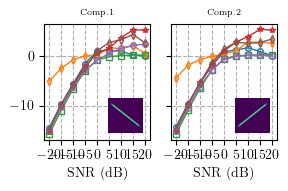

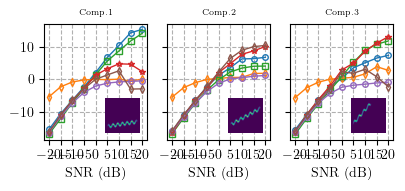

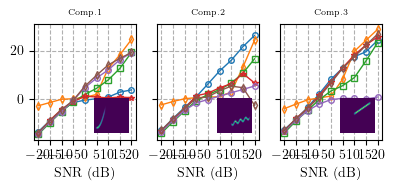

In [8]:
from benchmark_demo.ResultsInterpreter import ResultsInterpreter as ri

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

spsize = 0.35

signal_ids = np.unique(df['Signal Id.'])

for i,sid in enumerate(signal_ids):
    print(sid)
    df_aux = df[df['Signal Id.']==sid]
    signal = signal_dict[sid]()

    fig, axs = plt.subplots(1,
                            signal.total_comps,figsize=(1.5*signal.total_comps,1.5),
                            sharey=True)

    for j in range(signal.total_comps):
        ri.get_snr_plot(df_aux, 
                    x='SNR', 
                    y='Comp.{}'.format(j), 
                    hue='Method', 
                    axis = axs[j],
                    ms = 4,
                    linewidth=1.0,
                    markerfacecolor = 'none')

        S, _ = get_spectrogram(signal.comps[j], window = g)
        axins = inset_axes(axs[j], width=spsize, height=spsize, loc=4) #loc=spectrogram_loc[i])
        # axins.imshow(np.log(S), origin='lower')
        axins.imshow(S, origin='lower')
        axins.axis('off')
        fig.canvas.draw()
        axins.tick_params(axis='both', which='both', bottom=False, top=False, 
                        labelbottom=False, right=False, left=False, labelleft=False)

    
        # axs[j].get_legend().remove()
        # axs[j].set_aspect('auto')
        axs[j].set_ylabel('')
        axs[j].set_title('Comp.{}'.format(j+1), fontsize=6.0)
        axs[j].grid(True, linestyle='--', zorder=0)

<Axes: >

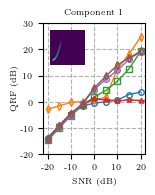

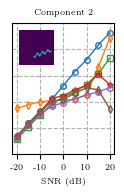

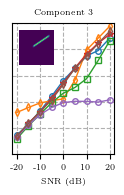

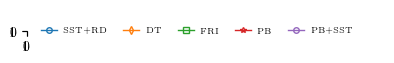

In [9]:
signal = signal_dict['McSyntheticMixture5']()
df_aux = df[df['Signal Id.']=='McSyntheticMixture5']

fig_w = 1.32
fig_h = 1.7

for j in range(signal.total_comps):
    fig, ax = plt.subplots(1,1,figsize=(fig_w,fig_h))

    ri.get_snr_plot(df_aux, 
                    x='SNR', 
                    y='Comp.{}'.format(j), 
                    hue='Method', 
                    axis = ax,
                    ms = 4,
                    linewidth=1.0,
                    markerfacecolor = 'none',
                    )
                    # linestyles='-',
                    # scale=0.4,
                    # errwidth=0,
                    # # markers=['o', 'v', 's', '+'],
                    # markers = {'facecolor':'none',}
                    # )
    # plt.setp(ggg.collections, alpha=.3) #for the markers
    # plt.setp(ggg.lines, alpha=.3)
    # Include an spectrogram of the component
    S, _ = get_spectrogram(signal.comps[j], window = g)
    axins = inset_axes(ax, width=spsize, height=spsize, loc=2) #loc=spectrogram_loc[i])
    # axins.imshow(np.log(S), origin='lower')
    axins.imshow(S, origin='lower')
    axins.axis('off')
    fig.canvas.draw()
    axins.tick_params(axis='both', which='both', bottom=False, top=False, 
                    labelbottom=False, right=False, left=False, labelleft=False)

    # Set the plot axis parameters.
    ax.set_xticks([ax.get_xticks()[i] for i in [0,2,4,6,8]])
    ax.set_xticklabels([-20,-10,0,10,20],fontsize=6.0)
    ax.set_yticks([-20,-10,0,10,20,30])
    ax.set_yticklabels([-20,-10,0,10,20,30],fontsize=6.0)
    # axs.set_xticklabels(, fontsize=6.0)
    if j==0:
        ax.set_ylabel(r'QRF (dB)', fontsize=6.0,labelpad=1)
    else:
        ax.set_ylabel(r'')
        ax.set_yticklabels([])
        ax.tick_params(axis=u'y', which=u'both',length=0)
        # ax.yaxis.set_major_locator(plt.NullLocator())

    ax.set_ylim([-20,30])    
    ax.set_xlabel(ax.get_xlabel(), fontsize=6.0)
    ax.set_title('Component {}'.format(j+1), fontsize=6.0)
    # ax.get_legend().remove()
    ax.grid(True,linestyle='--', zorder=0)
    fig.savefig('qrf_component_{}.pdf'.format(j), dpi=900, transparent=False, bbox_inches='tight', pad_inches=0)  

# new_legends = (r'SST+RD',r'Contours',r'DT',r'ES',r'PB',r'T-Garrote',r'T-Hard')
new_legends = (r'SST+RD',r'DT',r'FRI',r'PB',r'PB+SST')
legendFig = plt.figure(figsize=(3*fig_w,0.3))
# legendFig.set_size_inches((fig_size_w,fig_size_h))
h,l = ax.get_legend_handles_labels()
legendFig.legend(h,new_legends, 
            fontsize='xx-small', 
            frameon=False, 
            loc='center', 
            ncol=5
            )
legendFig.canvas.draw()
legendFig.savefig('legend_denoising.pdf', dpi=900, transparent=False, bbox_inches='tight')
legendFig.add_axes([0,0,0,0])    

In [10]:
filename = None
if filename is None:
    filename = '../results/last_benchmark_inst_frequency'

with open(filename + '.pkl', 'rb') as f:
    benchmark = pickle.load(f)  
print(isinstance(benchmark,Benchmark))
# print(benchmark.methods_ids)
results = benchmark.results
df = benchmark.dic2df(results)
# df = pd.DataFrame(results)
df = df.reset_index()
# df = df.drop(labels='level_3', axis=1)
col_names = list(df.columns)
col_names[0:5] = ['Signal Id.', 'SNR', 'Method', 'Parameters', 'Iteration']
df.columns = col_names
df['Method'] = df['Method']+ '-' + df['Parameters']
df

True


,Signal Id.,SNR,Method,Parameters,Iteration,Comp.0,Comp.1,Comp.2
0,McCrossingChirps,-20,"fri_method-([], [], [], [], [], [], [], True)","([], [], [], [], [], [], [], True)",0,0.032318,0.028299,NaN
1,McCrossingChirps,-20,"fri_method-([], [], [], [], [], [], [], True)","([], [], [], [], [], [], [], True)",1,0.034406,0.027531,NaN
2,McCrossingChirps,-20,"fri_method-([], [], [], [], [], [], [], True)","([], [], [], [], [], [], [], True)",2,0.025576,0.034832,NaN
3,McCrossingChirps,-20,"fri_method-([], [], [], [], [], [], [], True)","([], [], [], [], [], [], [], True)",3,0.038149,0.02381,NaN
4,McCrossingChirps,-20,"fri_method-([], [], [], [], [], [], [], True)","([], [], [], [], [], [], [], True)",4,0.026475,0.032337,NaN
...,...,...,...,...,...,...,...,...
1615,McSyntheticMixture5,20,"pseudo_bayesian_method-([], True, [], [], [], ...","([], True, [], [], [], 1, [], [], [], [], [], ...",5,0.001549,0.002974,0.012032
1616,McSyntheticMixture5,20,"pseudo_bayesian_method-([], True, [], [], [], ...","([], True, [], [], [], 1, [], [], [], [], [], ...",6,0.001465,0.005455,0.024019
1617,McSyntheticMixture5,20,"pseudo_bayesian_method-([], True, [], [], [], ...","([], True, [], [], [], 1, [], [], [], [], [], ...",7,0.00167,0.00376,0.011556
1618,McSyntheticMixture5,20,"pseudo_bayesian_method-([], True, [], [], [], ...","([], True, [], [], [], 1, [], [], [], [], [], ...",8,0.001535,0.002581,0.023135


McCrossingChirps


C:\Users\juan_\AppData\Local\Temp\ipykernel_36596\3990161390.py:38: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axs[j].set_ylim([1e-6,0])
C:\Users\juan_\AppData\Local\Temp\ipykernel_36596\3990161390.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[j].set_yticklabels(axs[j].get_yticklabels(),fontsize=6.0)


McSyntheticMixture
McSyntheticMixture5


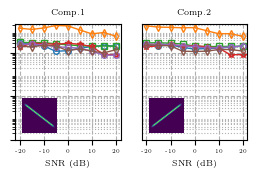

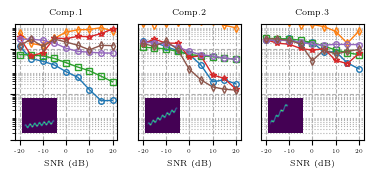

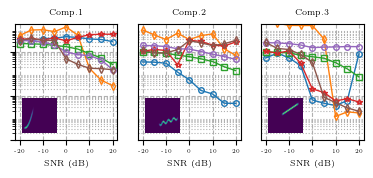

In [11]:
from benchmark_demo.ResultsInterpreter import ResultsInterpreter as ri

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

signal_ids = np.unique(df['Signal Id.'])

for i,sid in enumerate(signal_ids):
    print(sid)
    df_aux = df[df['Signal Id.']==sid]
    signal = signal_dict[sid]()

    fig, axs = plt.subplots(1,
                            signal.total_comps,figsize=(1.5*signal.total_comps,1.5),
                            sharey=True)

    for j in range(signal.total_comps):
        ri.get_snr_plot(df_aux, 
                    x='SNR', 
                    y='Comp.{}'.format(j), 
                    hue='Method', 
                    axis = axs[j],
                    ms = 4,
                    linewidth=1.0,
                    markerfacecolor = 'none',
                    plot_type='semilogy')

        S, _ = get_spectrogram(signal.comps[j], window = g)
        axins = inset_axes(axs[j], width=spsize, height=spsize, loc=3) #loc=spectrogram_loc[i])
        # axins.imshow(np.log(S), origin='lower')
        axins.imshow(S, origin='lower')
        axins.axis('off')
        fig.canvas.draw()
        axins.tick_params(axis='both', which='both', bottom=False, top=False, 
                        labelbottom=False, right=False, left=False, labelleft=False)


        axs[j].set_ylim([1e-6,0])
        # Set the plot axis parameters.
        axs[j].set_xticks([axs[j].get_xticks()[i] for i in [0,2,4,6,8]])
        axs[j].set_xticklabels([-20,-10,0,10,20],fontsize=4.0)
        # ax.set_yticks([-20,-10,0,10,20,30])

        # axs.set_xticklabels(, fontsize=6.0)
        if j==0:
            axs[j].set_ylabel(r'MSE', fontsize=6.0,labelpad=1)
            axs[j].set_yticklabels(axs[j].get_yticklabels(),fontsize=6.0)
        else:
            axs[j].set_ylabel(r'')
            axs[j].set_yticklabels([],fontsize=6.0)
            axs[j].tick_params(axis=u'y', which=u'both',length=0)
            # ax.yaxis.set_major_locator(plt.NullLocator())

        axs[j].set_xlabel(axs[j].get_xlabel(), fontsize=6.0)
        axs[j].set_title('Component {}'.format(j+1), fontsize=6.0)
        # ax.get_legend().remove()
        axs[j].grid(True,linestyle='--', zorder=0)
        axs[j].grid(True,which='minor',linestyle=':', zorder=0)
    
        # axs[j].get_legend().remove()
        # axs[j].set_aspect('auto')
        axs[j].set_ylabel('')
        axs[j].set_title('Comp.{}'.format(j+1), fontsize=6.0)
        axs[j].grid(True, linestyle='--', zorder=0)

<Axes: >

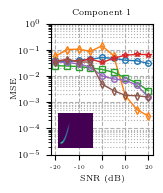

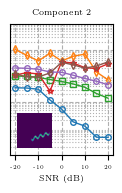

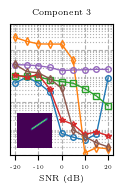

<Figure size 640x480 with 0 Axes>

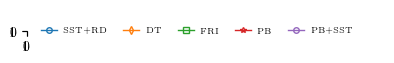

In [12]:
signal = signal_dict['McSyntheticMixture5']()
df_aux = df[df['Signal Id.']=='McSyntheticMixture5']

for j in range(signal.total_comps):
    fig, ax = plt.subplots(1,1,figsize=(fig_w,fig_h))

    ri.get_snr_plot(df_aux, 
                    x='SNR', 
                    y='Comp.{}'.format(j), 
                    hue='Method', 
                    axis = ax,
                    ms = 4,
                    linewidth=1.0,
                    markerfacecolor = 'none',
                    plot_type='semilogy')
                    # linestyles='-',
                    # scale=0.4,
                    # errwidth=0,
                    # # markers=['o', 'v', 's', '+'],
                    # markers = {'facecolor':'none',}
                    # )
    # plt.setp(ggg.collections, alpha=.3) #for the markers
    # plt.setp(ggg.lines, alpha=.3)
    # Include an spectrogram of the component
    S, _ = get_spectrogram(signal.comps[j], window = g)
    axins = inset_axes(ax, width=spsize, height=spsize, loc=3) #loc=spectrogram_loc[i])
    # axins.imshow(np.log(S), origin='lower')
    axins.imshow(S, origin='lower')
    axins.axis('off')
    fig.canvas.draw()
    axins.tick_params(axis='both', which='both', bottom=False, top=False, 
                    labelbottom=False, right=False, left=False, labelleft=False)
    
    
    # Set the plot axis parameters.
    ax.set_xticks([ax.get_xticks()[i] for i in [0,2,4,6,8]])
    ax.set_xticklabels([-20,-10,0,10,20],fontsize=4.0)
    # ax.set_yticks([-20,-10,0,10,20,30])
    
    
    if j==0:
        ax.set_ylabel(r'MSE', fontsize=6.0,labelpad=1)
        # ax.set_yticklabels(fontsize=6.0)
        ax.yaxis.set_tick_params(labelsize=6.0)
    else:
        ax.set_yticklabels([])
        ax.tick_params(axis=u'y', which=u'both',length=0)
        # ax.yaxis.set_major_locator(plt.NullLocator())
    ax.set_ylim([1e-5,1])

    ax.set_xlabel(ax.get_xlabel(), fontsize=6.0)
    ax.set_title('Component {}'.format(j+1), fontsize=6.0)
    # ax.get_legend().remove()
    ax.grid(True,linestyle='--', zorder=0)
    ax.grid(True,which='minor',linestyle=':', zorder=0)
    
    fig.savefig('instf_{}.pdf'.format(j), dpi=900, transparent=False, bbox_inches='tight',pad_inches = 0)  

new_legends = (r'SST+RD',r'DT',r'FRI',r'PB',r'PB+SST')
legendFig = plt.figure()
# legendFig.set_size_inches((fig_size_w,fig_size_h))
legendFig = plt.figure(figsize=(3*fig_w,0.3))
legendFig.legend(h,new_legends, 
            fontsize='xx-small', 
            frameon=False, 
            loc='center', 
            ncol=5
            )
legendFig.canvas.draw()
legendFig.savefig('legend_denoising.pdf', dpi=900, transparent=False, bbox_inches='tight',pad_inches = 0)
legendFig.add_axes([0,0,0,0])  